In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

from scipy.stats import kendalltau
from sklearn.metrics import mean_squared_error

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
def letter_annotation(ax, xoffset, yoffset, letter):
     ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
             size=14, weight='bold')

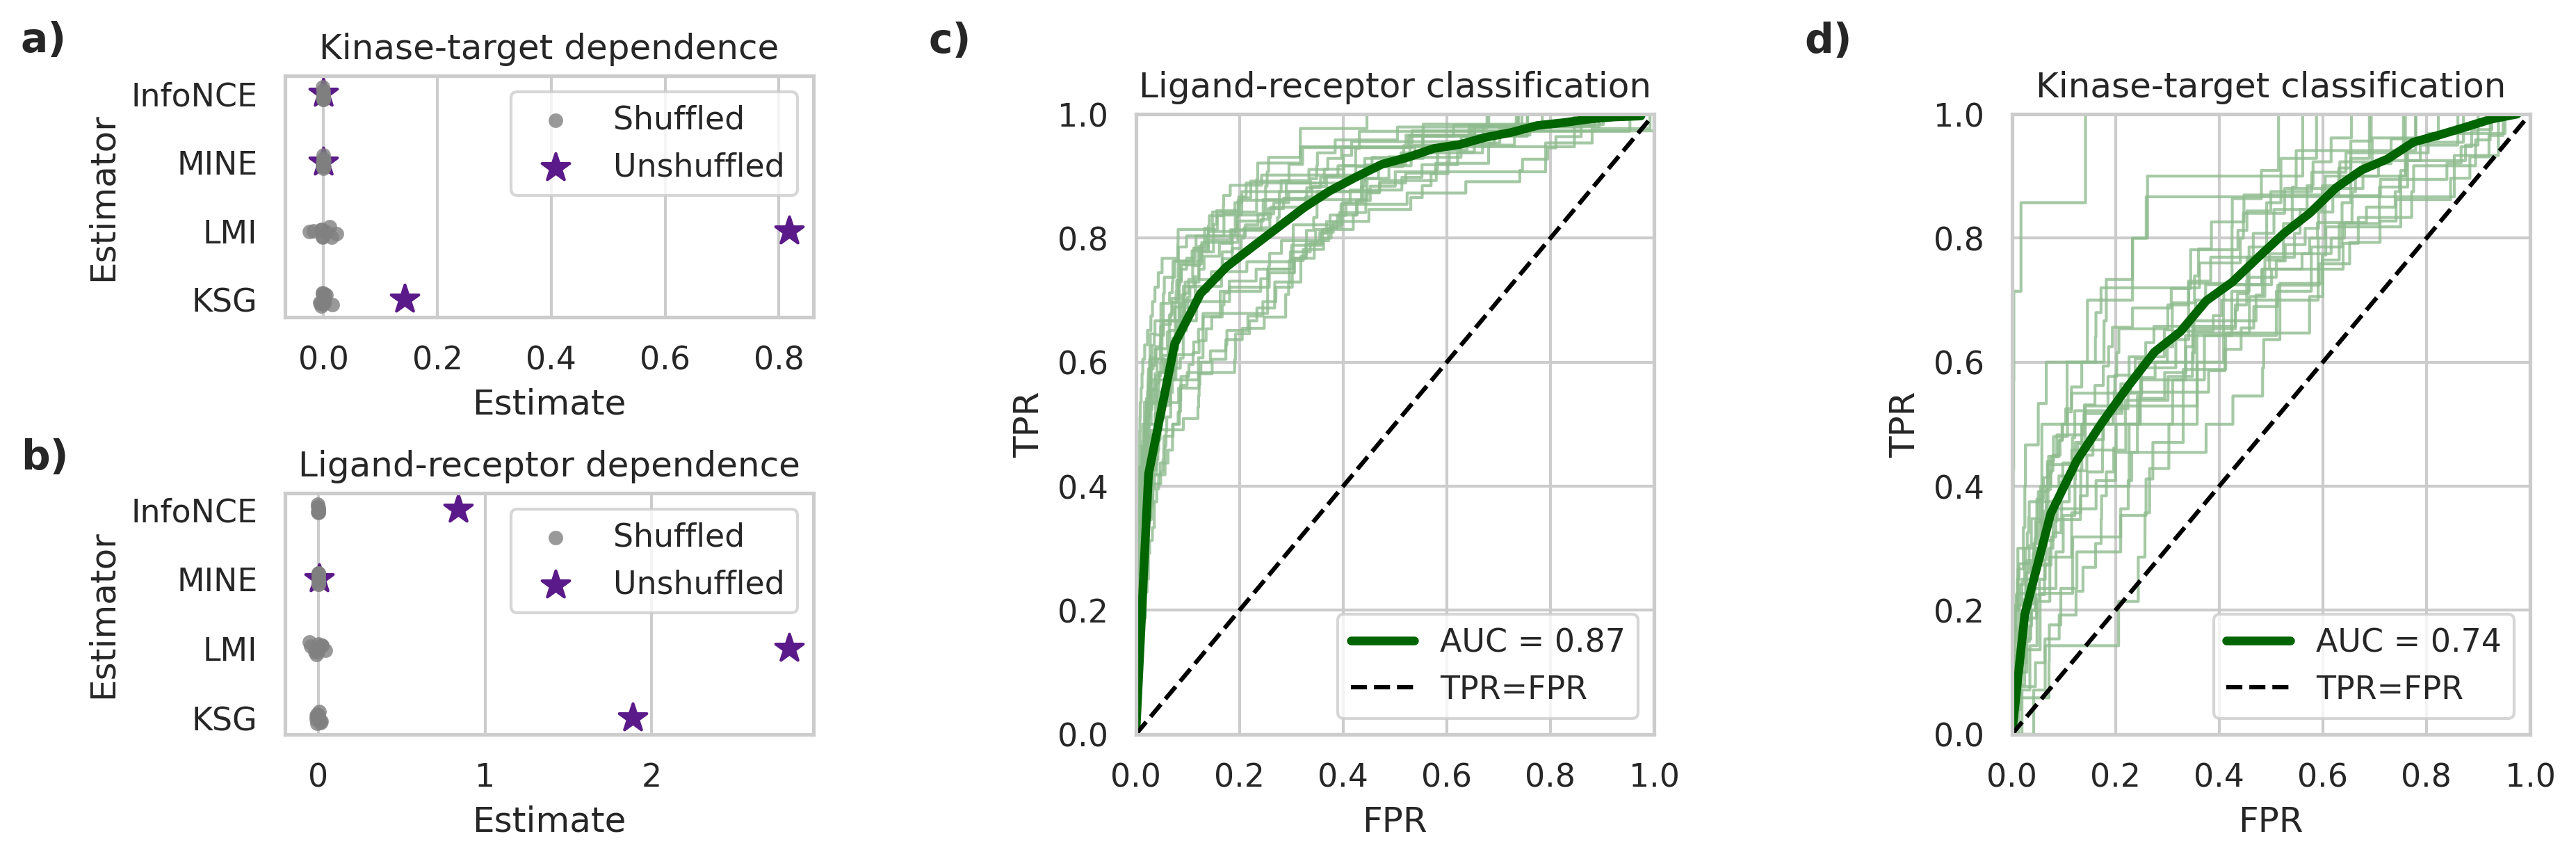

In [13]:
fig = plt.figure(figsize=(12, 4), dpi=300, layout="constrained")

ests, roc_lr, roc_kin = fig.subfigures(1, 3, wspace=0.15,
                                  width_ratios= (1, 1, 1))

ax_ests = ests.subplots(2, 1)
ax_roc_lr = roc_lr.subplots()
ax_roc_kin = roc_kin.subplots()

letter_annotation(ax_ests[0], -0.5, 1.1, "a)")
letter_annotation(ax_ests[1], -0.5, 1.1, "b)")
letter_annotation(ax_roc_lr, -0.4, 1.1, "c)")
letter_annotation(ax_roc_kin, -0.4, 1.1, "d)")

sns.set(style='whitegrid')
df = pd.read_csv('OP_kinase_shuffle.csv', index_col=0)

starcolor='#5b1a89'
s = 100

ax = ax_ests[0]
sns.stripplot(df[df['Shuffled']], x='Estimate', y='Estimator',
             alpha=0.8, color='grey', label='Shuffled', ax=ax)

ax.scatter(df['Estimate'].iloc[-4], 0, s=s, marker='*', color=starcolor, label='Unshuffled')
ax.scatter(df['Estimate'].iloc[-3], 1, s=s, marker='*', color=starcolor)
ax.scatter(df['Estimate'].iloc[-2], 2, s=s, marker='*', color=starcolor)
ax.scatter(df['Estimate'].iloc[-1], 3, s=s, marker='*', color=starcolor)
ax.legend()
ax.set_title('Kinase-target dependence')
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())

df = pd.read_csv('OP_LR_shuffle_test.csv', index_col=0)
ax = ax_ests[1]
sns.stripplot(df[df['Shuffled']], x='Estimate', y='Estimator',
             alpha=0.8, color='grey', label='Shuffled', ax=ax)

ax.scatter(df['Estimate'].iloc[-4], 0, s=s, marker='*', color=starcolor, label='Unshuffled')
ax.scatter(df['Estimate'].iloc[-3], 1, s=s, marker='*', color=starcolor)
ax.scatter(df['Estimate'].iloc[-2], 2, s=s, marker='*', color=starcolor)
ax.scatter(df['Estimate'].iloc[-1], 3, s=s, marker='*', color=starcolor)
ax.legend()
ax.set_title('Ligand-receptor dependence')
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())

df = pd.read_csv('OP_LR_roc.csv', index_col=0)
ax=ax_roc_lr

sns.lineplot(df,
             x='FPR',
            y="TPR", lw=1,
            units='Trial number', estimator=None, color='darkseagreen', alpha=0.8,
            ax=ax)

roc_auc = df['ROCAUC'].mean()

df['FPR bin'] = pd.cut(df['FPR'], bins=20, labels=False)/20 + 0.5/20

df.loc[-1] = [0,0,0,0,0]

sns.lineplot(df.groupby('FPR bin').mean().reset_index(),
            x='FPR', y='TPR', lw=3,
            color='darkgreen', label = 'AUC = %0.2f' % roc_auc,
            ax=ax)

ax.plot([0, 1], [0, 1],'black', label='TPR=FPR', linestyle='dashed')
ax.set_title('Ligand-receptor classification')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.legend(loc = 'lower right')

df = pd.read_csv('OP_kinases_roc.csv', index_col=0)
ax=ax_roc_kin

sns.lineplot(df,
             x='FPR',
            y="TPR", lw=1,
            units='Trial number', estimator=None, color='darkseagreen', alpha=0.8,
            ax=ax)

roc_auc = df['ROCAUC'].mean()

df['FPR bin'] = pd.cut(df['FPR'], bins=20, labels=False)/20 + 0.5/20

df.loc[-1] = [0,0,0,0,0]

sns.lineplot(df.groupby('FPR bin').mean().reset_index(),
            x='FPR', y='TPR', lw=3,
            color='darkgreen', label = 'AUC = %0.2f' % roc_auc,
            ax=ax)

ax.plot([0, 1], [0, 1],'black', label='TPR=FPR', linestyle='dashed')
ax.set_title('Kinase-target classification')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.legend(loc = 'lower right')

plt.show()